In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = pd.read_csv("../data/LoanApprovalPrediction.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(598, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 44.5+ KB


In [6]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,79,7,86
1.0,95,368,463
All,174,375,549


<AxesSubplot:>

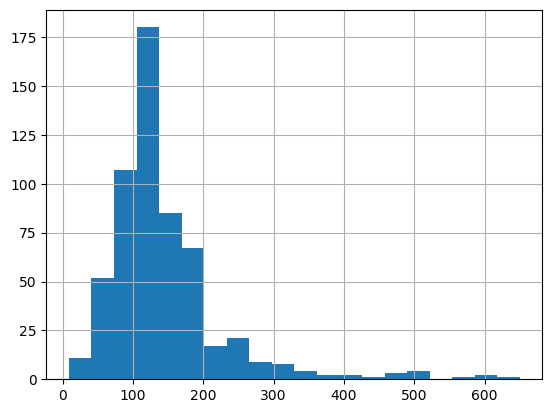

In [8]:
dataset["LoanAmount"].hist(bins=20)

In [9]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

<AxesSubplot:>

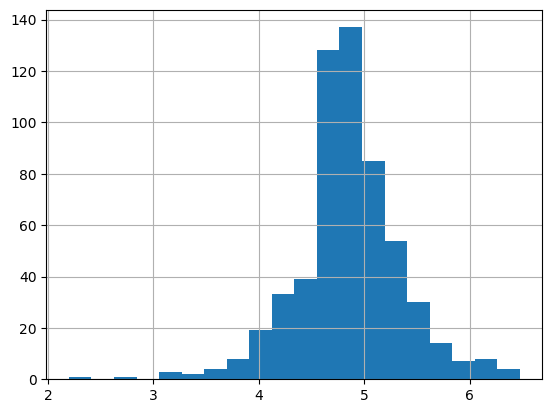

In [10]:
dataset['LoanAmount_log'].hist(bins=20)

In [12]:
dataset.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
LoanAmount_log       21
dtype: int64

In [13]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace = True)

In [14]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace = True)

In [15]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace = True)

In [16]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [17]:
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [18]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [19]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [20]:
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<AxesSubplot:>

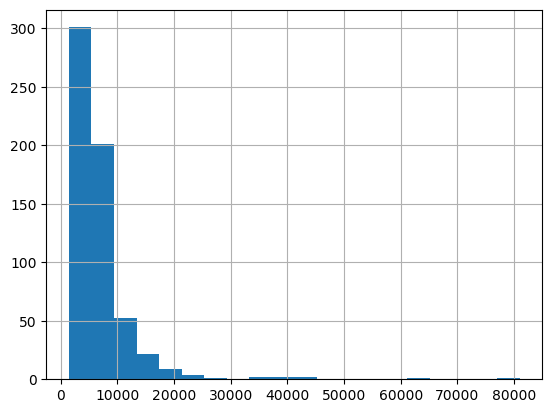

In [22]:
dataset['TotalIncome'].hist(bins=20)

<AxesSubplot:>

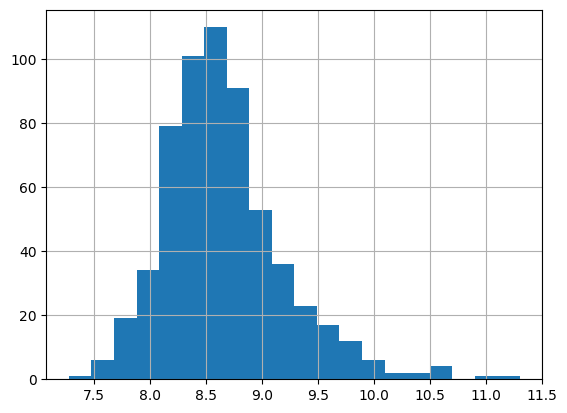

In [23]:
dataset['TotalIncome_log'].hist(bins=20)

In [24]:
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y,4.850145,5849.0,8.674026
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [27]:
X = dataset.iloc[:,np.r_[1:5,9:11,13:15]].values

In [29]:
Y = dataset.iloc[:,12].values

In [30]:
X

array([['Male', 'No', 0.0, ..., 1.0, 4.850145095517304, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [31]:
Y


array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
print(X_train)

[['Male' 'Yes' 2.0 ... 1.0 5.10594547390058 11500.0]
 ['Female' 'No' 0.0 ... 0.0 4.634728988229636 5000.0]
 ['Male' 'Yes' 1.0 ... 1.0 5.147494476813453 7283.0]
 ...
 ['Male' 'No' 0.0 ... 0.0 4.820281565605037 5124.0]
 ['Female' 'No' 0.0 ... 1.0 4.787491742782046 4272.0]
 ['Male' 'Yes' 2.0 ... 1.0 5.616771097666572 16666.0]]


In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [36]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [37]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [38]:
X_train

array([[1, 1, 2, ..., 1.0, 5.10594547390058, 399],
       [0, 0, 0, ..., 0.0, 4.634728988229636, 188],
       [1, 1, 1, ..., 1.0, 5.147494476813453, 321],
       ...,
       [1, 0, 0, ..., 0.0, 4.820281565605037, 197],
       [0, 0, 0, ..., 1.0, 4.787491742782046, 121],
       [1, 1, 2, ..., 1.0, 5.616771097666572, 419]], dtype=object)

In [39]:
labelencoder_Y = LabelEncoder()
Y_train = labelencoder_Y.fit_transform(Y_train)

In [40]:
Y_train

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [41]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [42]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [43]:
labelencoder_Y = LabelEncoder()
Y_test = labelencoder_Y.fit_transform(Y_test)

In [44]:
Y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTClassifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
Y_pred = DTClassifier.predict(X_test)
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [50]:
from sklearn import metrics
print("prediction accuracy", metrics.accuracy_score(Y_pred, Y_test))


prediction accuracy 0.7083333333333334


In [51]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, Y_train)

GaussianNB()

In [52]:
Y_pred = NBClassifier.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [53]:
print("prediction accuracy", metrics.accuracy_score(Y_pred, Y_test))

prediction accuracy 0.8083333333333333
